# Exploratory Data Analysis - Univariate analysis
matplotlib  
seaborn

#### Categorical feature vs Continuous feature
Categorical feature - An attribute that holds data in discrete form, typically limited to a set of possible values. Examples include customer name, grade, purpose, and default.
Continuous feature - An attribute that holds data in the form of an integer or real number, with an infinite number of possible values between its lower and upper bounds. Examples include loan amount, temperature, height, weight, and age.

#### Comparision visualization 
Box plot - Can visualize distribution of continuous feature against the values of categorical feature.
#### Relationship visualization 
Scatter plot, line charts - Can visualize relationship between two or more continuous features.
#### Distribution visualization 
Histogram - Can visualize distribution of the values of a continuous feature. E.g: Most common value of a feature
#### Composition visualization 
Pie chart, stacked bar chart, grouped bar chart - Component makeup of a categorical feature. E.g: How many customers are in each segment

### Quick reference - <br>

Univariate - <br>
N -> Histogram, Boxplot <br>
C -> Countplot <br>

Bi-variate - <br>
N - N -> Scatter, Line, Heat, Joint, Violin <br>
N - C -> Line, Catplot, Boxplot <br>
C - C -> Count, Box <br>

Multivariate - <br>
Catplot <br>

## Sanity checks part 1
### Data Description (Melbourne_Housing.csv) :

The detailed data dictionary is given below:

* Suburb - Suburb in which the property is located
* Rooms - Number of rooms in the property
* Type - Type of the property like 
    * h - house,cottage,villa, semi,terrace, 
    * t - townhouse,
    * u - unit, duplex
* SellerG - Name of the real estate agent who sold the property
* Date - Date on which the property was sold
* Distance - Distance of the property from CBD in kilometres. CBD is the central business district of the city.
* Postcode - Postcode of the area
* Bedroom - Number of bedrooms in the property
* Bathroom - Number of bathrooms in the property
* Car - Number of car parking spaces in the property
* Landsize - Size of the land in square metres
* BuildingArea - Size of the building in square metres (Generally, building size is smaller than land size since someone can have personal gardens and other things in the property.) 
* YearBuilt - Year in which the building was built
* Regionname - Name of the region in which the property is located like Eastern Metropolitan, Western Metropolitan, Northern Victoria etc.
* Propertycount - Number of properties that are present in the suburb
* Price - price (in AUD) at which the property was sold

In [1]:
# to help with reading and manipulating data
import numpy as np
import pandas as pd

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# to restrict the float value to 3 decimal places
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# display cell output
pd.set_option('display.width', 300)

data = pd.read_csv('data/Melbourne_Housing.csv')
print(data.info())
print('*****' * 30)
print(data.describe())
print('*****' * 30)
print(data.head(4))
print('*****' * 30)
print(data.tail(4))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27114 entries, 0 to 27113
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         27114 non-null  object 
 1   Rooms          27114 non-null  int64  
 2   Type           27114 non-null  object 
 3   SellerG        27114 non-null  object 
 4   Date           27114 non-null  object 
 5   Distance       27113 non-null  float64
 6   Postcode       27113 non-null  float64
 7   Bedroom        20678 non-null  float64
 8   Bathroom       20672 non-null  float64
 9   Car            20297 non-null  float64
 10  Landsize       17873 non-null  float64
 11  BuildingArea   10543 non-null  object 
 12  YearBuilt      11985 non-null  float64
 13  Regionname     27114 non-null  object 
 14  Propertycount  27114 non-null  int64  
 15  Price          27114 non-null  int64  
dtypes: float64(7), int64(3), object(6)
memory usage: 3.3+ MB
None
********************************

In [13]:
# Unique sellers
print(len(data['SellerG'].unique()))
print('*****' * 30)
print(data['SellerG'].unique())
print('*****' * 30)
print(data['SellerG'].value_counts())
print('*****' * 30)
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)
print(data.sample(5))
print('*****' * 30)
print(data.groupby(['SellerG'])['Price'].sum())
print('*****' * 30)
print(data[data['SellerG'] == 'ASL']['Price'].sum())


347
******************************************************************************************************************************************************
['Nelson' 'hockingstuart' 'Thomson' 'Brace' 'Jellis' 'Greg' 'FN' 'Jas'
 'Marshall' 'Tim' 'Moonee' 'Gary' 'Noel' 'Fletchers' 'Woodards' 'Ray'
 'C21' 'Buxton' 'Barry' 'Nick' 'Brad' 'Peter' 'RT' 'McGrath' 'LITTLE'
 'Chisholm' 'Burnham' 'Kay' "Abercromby's" 'Stockdale' 'Eview' 'Haughton'
 'Miles' 'Rendina' 'Sweeney' 'J' 'Cayzer' 'Lindellas' "O'Brien" 'Village'
 'McDonald' 'Biggin' 'Hodges' 'Wilson' 'Harcourts' 'Domain' 'Dingle'
 'VICPROP' 'Considine' 'Frank' 'GL' 'Douglas' 'Zahn' 'Darren' 'Gunn&Co'
 'Philip' 'RW' 'North' 'Del' 'Melbourne' 'Purplebricks' 'Morleys' 'Naison'
 'Walshe' 'YPA' 'William' 'Reach' 'Raine' 'New' 'Leased' 'Blue'
 'Buckingham' 'Ken' 'MICM' 'Harrington' 'Iconek' 'Caine' 'Alexkarbon'
 'Pride' 'Lucas' 'RE' 'Maddison' 'Bells' 'Joseph' 'Century' 'Bekdon'
 'Nicholson' 'Charlton' 'Pagan' 'Edward' 'Galldon' 'Rodney' 'Willia

In [19]:
print(data['SellerG'].value_counts(normalize=True))

SellerG
Nelson          0.101
Jellis          0.093
Barry           0.088
hockingstuart   0.077
Ray             0.058
                 ... 
Allan           0.000
Jim             0.000
iProperty       0.000
Batty           0.000
Icon            0.000
Name: proportion, Length: 347, dtype: float64


In [31]:
print(data['BuildingArea'].unique())
print('*****' * 30)
# checking the count of different data types in buildingArea column
print(data['BuildingArea'].apply(type).value_counts())
print('*****' * 30)
# replacing values with nan
data['BuildingArea'] = data['BuildingArea'].replace(['missing','inf'], np.nan)
# changing the data type to float
data['BuildingArea'] = data['BuildingArea'].astype(float)
print(data['BuildingArea'].info())
print('*****' * 30)
print(data['BuildingArea'].apply(type).value_counts())

['225' '82' 'inf' '263' '242' '251' '117' 'missing' '76' '399' '118' '103'
 '180' '123' '218' '129' '167' '154' '275' '121' nan '125' '255' '75'
 '156' '240' '268' '108' '69' '140' '214' '253' '189' '215' '96' '104'
 '100' '313' '144' '93' '110' '70' '122' '51' '147' '113' '83' '56' '137'
 '85' '64' '175' '3558' '170' '265' '353' '138' '19' '116' '87' '74' '320'
 '300' '210' '120' '86' '97' '200' '106' '14' '161' '128' '185' '146'
 '133' '115' '143' '150' '195' '236' '276' '188' '179' '249' '141' '34'
 '73' '107' '84' '81' '207' '50' '264' '312' '235' '221' '183' '132' '160'
 '186' '78' '105' '145' '62' '220' '315' '181' '61' '112' '420' '226'
 '266' '410' '449' '356' '477' '250' '95' '190' '284' '247' '213' '209'
 '119' '111' '130' '348' '166' '44' '176' '98' '159' '79' '71' '60' '33'
 '89' '217' '127' '187' '109' '53' '201' '12' '63' '223' '102' '254' '327'
 '16' '165' '65' '139' '134' '280' '67' '272' '38' '153' '66' '152' '135'
 '374' '163' '124' '233' '39' '151' '279' '136' '405' 

In [32]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27114 entries, 0 to 27113
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         27114 non-null  object        
 1   Rooms          27114 non-null  int64         
 2   Type           27114 non-null  object        
 3   SellerG        27114 non-null  object        
 4   Date           27114 non-null  datetime64[ns]
 5   Distance       27113 non-null  float64       
 6   Postcode       27113 non-null  float64       
 7   Bedroom        20678 non-null  float64       
 8   Bathroom       20672 non-null  float64       
 9   Car            20297 non-null  float64       
 10  Landsize       17873 non-null  float64       
 11  BuildingArea   10529 non-null  float64       
 12  YearBuilt      11985 non-null  float64       
 13  Regionname     27114 non-null  object        
 14  Propertycount  27114 non-null  int64         
 15  Price          2711

In [35]:
# We could have also done replacement of 'missing' and 'inf' to NaN while loading data by using na_values parameter of read_csv function.
# eg use
data_new = pd.read_csv('data/Melbourne_Housing.csv', na_values=['missing','inf'])
print(data_new.info())
print(data_new['BuildingArea'].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27114 entries, 0 to 27113
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         27114 non-null  object 
 1   Rooms          27114 non-null  int64  
 2   Type           27114 non-null  object 
 3   SellerG        27114 non-null  object 
 4   Date           27114 non-null  object 
 5   Distance       27113 non-null  float64
 6   Postcode       27113 non-null  float64
 7   Bedroom        20678 non-null  float64
 8   Bathroom       20672 non-null  float64
 9   Car            20297 non-null  float64
 10  Landsize       17873 non-null  float64
 11  BuildingArea   10529 non-null  float64
 12  YearBuilt      11985 non-null  float64
 13  Regionname     27114 non-null  object 
 14  Propertycount  27114 non-null  int64  
 15  Price          27114 non-null  int64  
dtypes: float64(8), int64(3), object(5)
memory usage: 3.3+ MB
None
[ 225.       82.           nan  

## Sanity checks - Part2
Missing value treatment  
Remove duplicate entries in data  
Check the count and Percentage of categorical levels in each column  

In [64]:
# Check for missing values in the data
data.isnull().sum()

Suburb               0
Rooms                0
Type                 0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom           6436
Bathroom          6442
Car               6817
Landsize          9241
BuildingArea     16571
YearBuilt        15129
Regionname           0
Propertycount        0
Price                0
dtype: int64

In [65]:
# Check for duplicate entries in the data
data.duplicated().sum()

np.int64(11)

In [66]:
# dropping duplicates entries from the data
data.drop_duplicates(inplace=True)
print(data.duplicated().sum())
print('*****' * 30)
print(data.head(5))

0
******************************************************************************************************************************************************
         Suburb  Rooms Type        SellerG        Date  Distance  Postcode  Bedroom  Bathroom   Car  Landsize BuildingArea  YearBuilt             Regionname  Propertycount    Price
0  Airport West      3    t         Nelson  03-09-2016    13.500  3042.000    3.000     2.000 1.000   303.000          225   2016.000   Western Metropolitan           3464   840000
1   Albert Park      2    h  hockingstuart  03-09-2016     3.300  3206.000    2.000     1.000 0.000   120.000           82   1900.000  Southern Metropolitan           3280  1275000
2   Albert Park      2    h        Thomson  03-09-2016     3.300  3206.000    2.000     1.000 0.000   159.000          inf        NaN  Southern Metropolitan           3280  1455000
3    Alphington      4    h          Brace  03-09-2016     6.400  3078.000    3.000     2.000 4.000   853.000          263 

In [67]:
# resetting the index of data frame since some rows will be removed
data.reset_index(drop=True, inplace=True)
print('*****' * 30)
print(data.head(5))

******************************************************************************************************************************************************
         Suburb  Rooms Type        SellerG        Date  Distance  Postcode  Bedroom  Bathroom   Car  Landsize BuildingArea  YearBuilt             Regionname  Propertycount    Price
0  Airport West      3    t         Nelson  03-09-2016    13.500  3042.000    3.000     2.000 1.000   303.000          225   2016.000   Western Metropolitan           3464   840000
1   Albert Park      2    h  hockingstuart  03-09-2016     3.300  3206.000    2.000     1.000 0.000   120.000           82   1900.000  Southern Metropolitan           3280  1275000
2   Albert Park      2    h        Thomson  03-09-2016     3.300  3206.000    2.000     1.000 0.000   159.000          inf        NaN  Southern Metropolitan           3280  1455000
3    Alphington      4    h          Brace  03-09-2016     6.400  3078.000    3.000     2.000 4.000   853.000          263   

In [69]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,27103.000,2.992,0.955,1.000,2.000,3.000,4.000,16.000
Distance,27102.000,11.280,6.784,0.000,6.400,10.500,14.000,48.100
Postcode,27102.000,3113.787,111.129,3000.000,3046.000,3088.000,3153.000,3978.000
Bedroom,20678.000,3.046,0.955,0.000,2.000,3.000,4.000,20.000
Bathroom,20672.000,1.592,0.701,0.000,1.000,1.000,2.000,9.000
Car,20297.000,1.716,0.994,0.000,1.000,2.000,2.000,18.000
Landsize,17873.000,560.537,1411.309,50.000,220.000,513.000,664.000,76000.000
YearBuilt,11985.000,1966.618,36.042,1850.000,1950.000,1970.000,2000.000,2019.000
Propertycount,27103.000,7564.741,4494.028,83.000,4294.000,6567.000,10412.000,21650.000
Price,27103.000,1050664.131,641660.161,85000.000,635000.000,871000.000,1300000.000,11200000.000


In [71]:
# find the entries with Rooms =16
print(data[data['Rooms'] == 16])

        Suburb  Rooms Type SellerG        Date  Distance  Postcode  Bedroom  Bathroom   Car  Landsize BuildingArea  YearBuilt            Regionname  Propertycount    Price
25916  Mitcham     16    h  Buxton  28-10-2017    17.200  3132.000   16.000     8.000 8.000       NaN          NaN        NaN  Eastern Metropolitan           6871  5000000


In [72]:
# Check the total number of unique values in the Postcode column
data['Postcode'].nunique()

209

In [ ]:
# Making a list of all categorical variables
cat_col = ['Suburb', 'Type', 'SellerG', 'Regionname']

# Printing the count of unique categorical levels in each column and its percentage
for column in cat_col:
    print(data[column].value_counts())
    print("-" * 50)

print('*****' * 30)

# Print its percentage
for column in cat_col:
    print(data[column].value_counts(normalize=True))
    print("-" * 50)


Suburb
Reservoir         724
Bentleigh East    493
Richmond          437
Preston           410
Brunswick         383
                 ... 
Wandin North        1
Ferny Creek         1
Tecoma              1
Montrose            1
viewbank            1
Name: count, Length: 345, dtype: int64
--------------------------------------------------
Type
h    18394
u     5882
t     2827
Name: count, dtype: int64
--------------------------------------------------
SellerG
Nelson           2733
Jellis           2516
Barry            2385
hockingstuart    2096
Ray              1574
                 ... 
Allan               1
Jim                 1
iProperty           1
Batty               1
Icon                1
Name: count, Length: 347, dtype: int64
--------------------------------------------------
Regionname
Southern Metropolitan         8480
Northern Metropolitan         7809
Western Metropolitan          5792
Eastern Metropolitan          3264
South-Eastern Metropolitan    1336
Northern Victoria   

## Visualization techniques => Univariate Analysis => **Histogram**
1. **Histogram**
2. **Boxplot**
3. **Bar Graph**
4. **Line Plot**

### Histogram 
**It's a univariate plot which helps us understand the distribution of a continuous numerical variable.**  
**It breaks the range of the continuous variables into intervals of equal length and then counts the number of observations in each interval.**  
**We will use the histplot() function of seaborn to create histograms.**  

Distribution visualization 
Histogram - Can visualize distribution of the values of a continuous feature. E.g: Most common value of a feature

hue parameter  
FacetGrid

In [104]:
import pandas as pd

df = pd.read_csv('data/Automobile.csv')
print(df.columns)
print("*******" * 30)
print(df.shape)
print("*******" * 30)
print(df.info())
print("*******" * 30)
print(df.head(5))
print("*******" * 30)
print(df['price'].min(), df['price'].max())
print("*******" * 30)
print(df['price'].value_counts())
print("*******" * 30)
print(df.groupby(['price'])['price'].value_counts().sort_values(ascending=True))

Index(['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration', 'number_of_doors', 'body_style', 'drive_wheels', 'engine_location', 'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_type', 'number_of_cylinders', 'engine_size', 'fuel_system', 'bore', 'stroke',
       'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price'],
      dtype='object')
******************************************************************************************************************************************************************************************************************
(201, 26)
******************************************************************************************************************************************************************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------ 

<Axes: title={'center': 'Histogram: price'}, xlabel='Price of cars', ylabel='Frequency'>

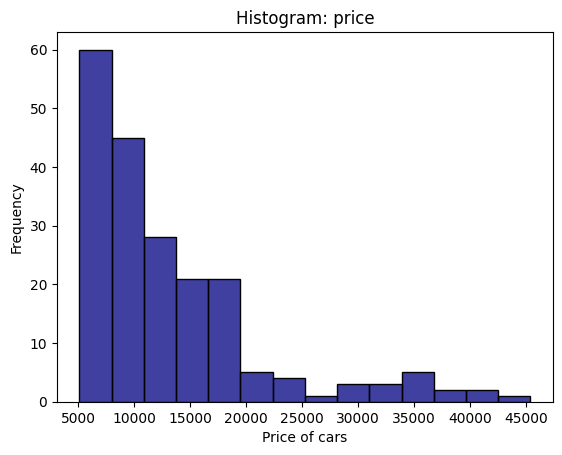

In [97]:
plt.title('Histogram: price')
#plt.xlim(4500, 46000)
#plt.ylim(0, 70)
plt.xlabel('Price of cars')
plt.ylabel('Frequency')
sns.histplot(data=df, x='price', color='navy')

<Axes: title={'center': 'Histogram: price'}, xlabel='Price of cars', ylabel='Frequency'>

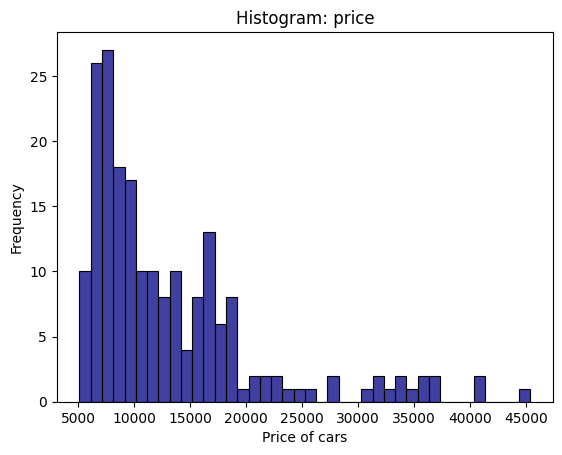

In [107]:
# specify the number of intervals (or groups or bins) to create by setting the bins parameter
plt.title('Histogram: price')
#plt.xlim(4500, 46000)
#plt.ylim(0, 70)
plt.xlabel('Price of cars')
plt.ylabel('Frequency')
sns.histplot(data=df, x='price', bins=40, color='navy')

<Axes: title={'center': 'Histogram: price'}, xlabel='Price of cars', ylabel='Frequency'>

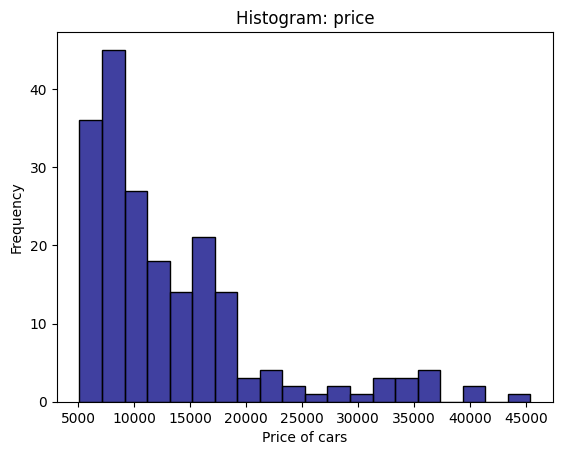

In [110]:
# binwidth
plt.title('Histogram: price')
#plt.xlim(4500, 46000)
#plt.ylim(0, 70)
plt.xlabel('Price of cars')
plt.ylabel('Frequency')
sns.histplot(data=df, x='price', binwidth = 2000, color='navy')

### How to find the optimal number of bins: Rule of thumb
* calculate the bin-width first, using the formula
$$ binwidth =\frac{(2 * IQR)}{\sqrt[3]{n}} $$
where n = number of rows in the dataset  
IQR = Inter quartile range. Difference between 75 and 25 percentile

* then, we obtain bins using the calculated bin-width. $$ bins =\frac{Range}{binwidth} $$

* **In addition to the bars, we can also add a density estimate by setting the *kde* parameter to *True*.**

- **Kernel Density Estimation**, or **KDE**, visualizes the distribution of data over a continuous interval.
- The conventional scale for KDE is: **Total frequency of each bin × Probability**

<Axes: title={'center': 'Histogram: price'}, xlabel='Price of cars', ylabel='Frequency'>

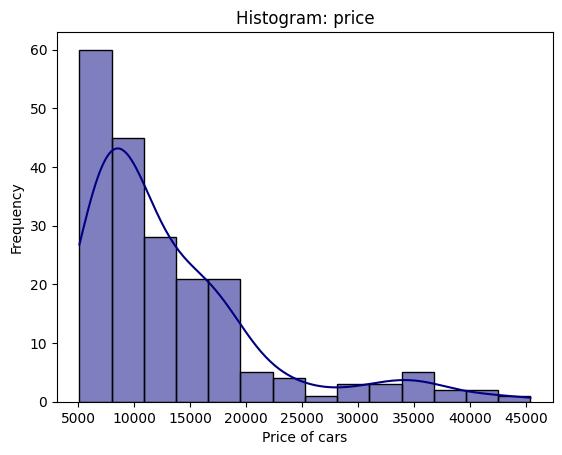

In [111]:
plt.title('Histogram: price')
#plt.xlim(4500, 46000)
#plt.ylim(0, 70)
plt.xlabel('Price of cars')
plt.ylabel('Frequency')
sns.histplot(data=df, x='price',kde = True, color='navy')

<Axes: title={'center': 'Histogram: curb_weight'}, xlabel='curb_weight', ylabel='Frequency'>

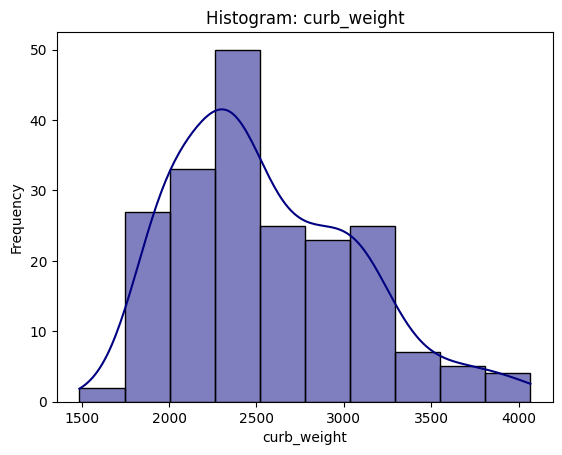

In [112]:
plt.title('Histogram: curb_weight')
#plt.xlim(4500, 46000)
#plt.ylim(0, 70)
plt.xlabel('curb_weight')
plt.ylabel('Frequency')
sns.histplot(data=df, x = 'curb_weight', kde = True, color = 'navy')

<Axes: title={'center': 'Histogram: horsepower'}, xlabel='Horsepower', ylabel='Frequency'>

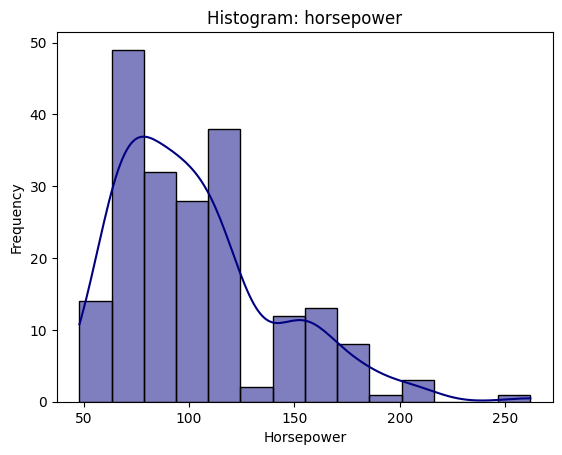

In [113]:
plt.title('Histogram: horsepower')
#plt.xlim(4500, 46000)
#plt.ylim(0, 70)
plt.xlabel('Horsepower')
plt.ylabel('Frequency')
sns.histplot(data=df, x = 'horsepower', kde = True, color = 'navy')

### While histograms are traditionally associated with numerical data, adapting them to categorical variables offers a visual means of understanding the frequency of different categories within your dataset.
Subplots provide a unified figure layout, ensuring consistent axes scaling and alignment across multiple plots.

<Axes: title={'center': 'Histogram: Price by body_style'}, xlabel='price', ylabel='Frequency'>

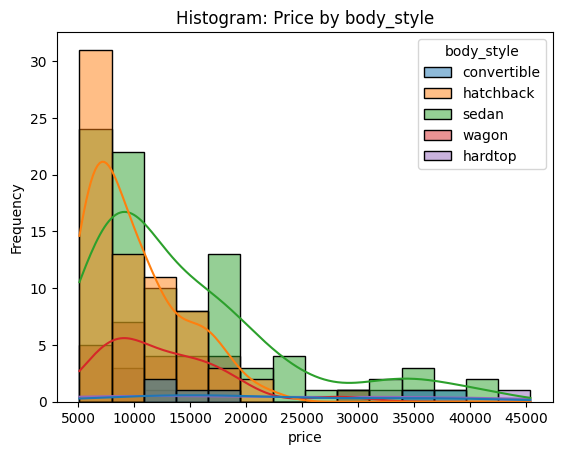

In [114]:
# Compare the distribution of several groups
plt.title('Histogram: Price by body_style')
#plt.xlim(4500, 46000)
#plt.ylim(0, 70)
plt.xlabel('price')
plt.ylabel('Frequency')
sns.histplot(data=df, x = 'price', hue = 'body_style' ,kde = True, color = 'navy')

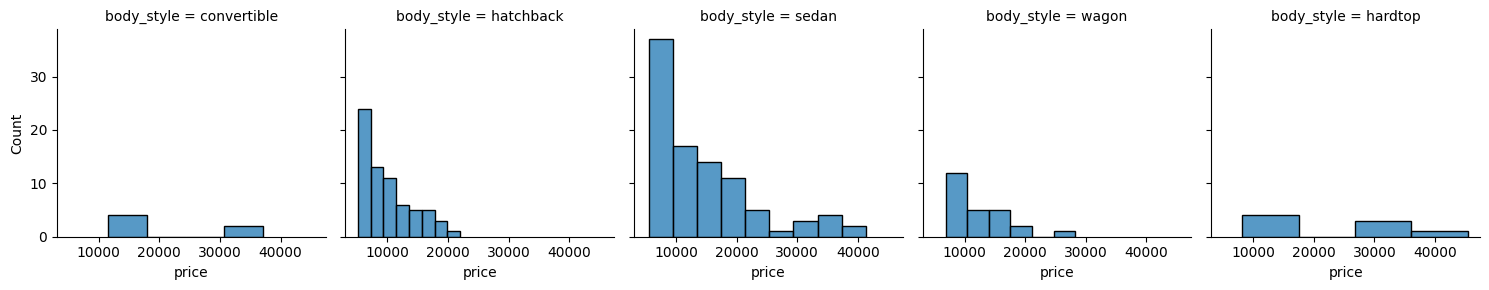

In [117]:
g = sns.FacetGrid(df, col='body_style')
g.map(sns.histplot, 'price')

## Visualization techniques => Univariate Analysis => **Boxplot**
1. **Histogram**
2. **Boxplot**
3. **Bar Graph**
4. **Line Plot**

Note - Ipython.display is a powerful tool that allows you to display various file formats directly within your notebooks, enhancing your ability to share and collaborate on data visualization.

### Box plot

A box plot, also known as a box-and-whisker plot, is a graphical representation of the five-number summary of a dataset:   
minimum,  
first quartile (25th percentile),  
median (50th percentile),  
third quartile (75th percentile),  
maximum.  
The whiskers extend from the box to the farthest data points that are not outliers, typically defined as values outside of 1.5 times the interquartile range (IQR) above the third quartile or below the first quartile. 
 
<img src="images/box-and-whisker-plot-for-the-standard-normal-distribution.webp" alt="Prefix sum" width="400" height="300">

IQR is resistant to outliers, making it a robust statistic for understanding the central tendency of your dataset.

* In a boxplot, when the median is closer to the bottom of the box, and the whisker is shorter on the lower end of the box, then we say that the distribution is positively skewed (skewed right).
* Similarly, when the median is closer to the top of the box, and the whisker is shorter on the upper end of the box, then we say that the distribution is negatively skewed (skewed left).

1. Positively skewed (skewed right):
- The bulk of the data is concentrated on the left
- There is a longer "tail" stretching to the right
- Think of it as the distribution being "pulled" toward the right
- In the boxplot, this shows up as the median being closer to the bottom of the box

2. Negatively skewed (skewed left):
- The bulk of the data is concentrated on the right
- There is a longer "tail" stretching to the left
- Think of it as the distribution being "pulled" toward the left
- In the boxplot, this shows up as the median being closer to the top of the box

Comparision visualization 
Box plot - Can visualize distribution of continuous feature against the values of categorical feature.

Right skewed box plot has longer right whiskers and shorter left whiskers.
Left skewed box plot has longer left whiskers and shorter right whiskers.  

<img src="images/right-left-skew.png" alt="Prefix sum" width="400" height="300">  <br>

<img src="images/mean_median_relationship.png" alt="Prefix sum" width="400" height="300">

<Axes: xlabel='curb_weight'>

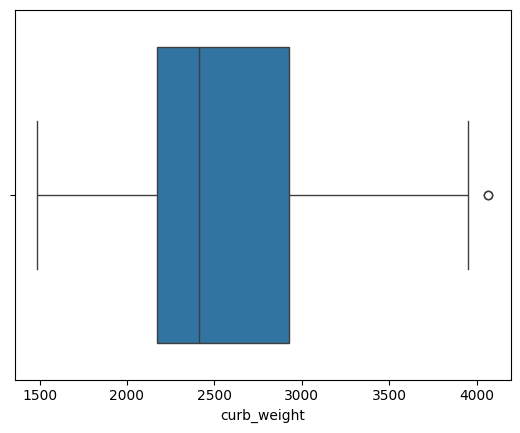

In [122]:
# create box plot with seaborn
sns.boxplot(data=df, x='curb_weight')

<Axes: title={'center': 'Boxplot:Horsepower'}, xlabel='Horsepower'>

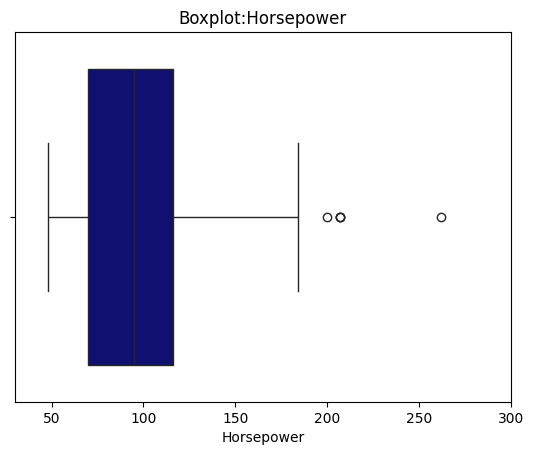

In [119]:
plt.title('Boxplot:Horsepower')
plt.xlabel('Horsepower')
plt.xlim(30, 300)
sns.axes_style('whitegrid')
sns.boxplot(data=df, x='horsepower', color='navy')

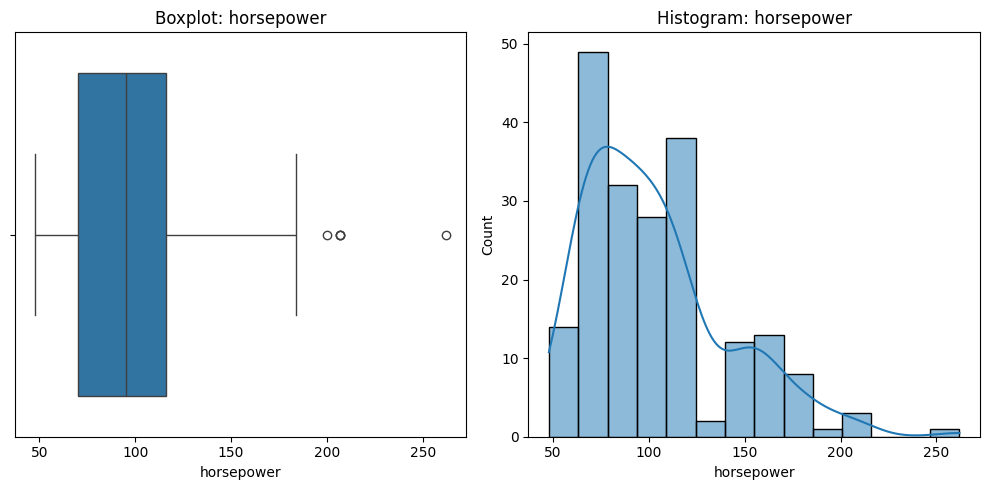

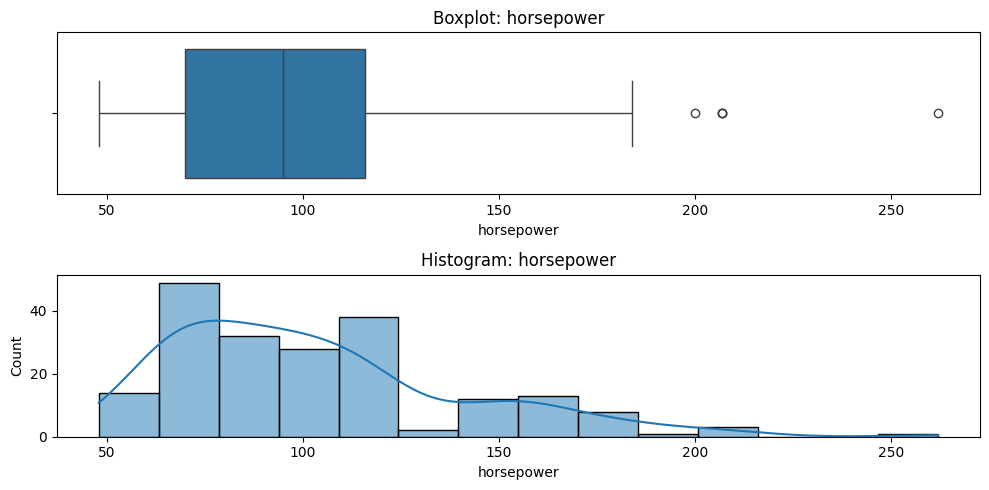

In [124]:
# Method 1: Side by side plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns, figure size 15x5

# Boxplot
sns.boxplot(data=df, x='horsepower', ax=ax1)
ax1.set_title('Boxplot: horsepower')

# Histogram
sns.histplot(data=df, x='horsepower', kde=True, ax=ax2)
ax2.set_title('Histogram: horsepower')

plt.tight_layout()  # Adjust spacing between plots
plt.show()

# Method 2: One above the other
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 5))  # 2 rows, 1 column, figure size 10x8

# Boxplot
sns.boxplot(data=df, x='horsepower', ax=ax1)
ax1.set_title('Boxplot: horsepower')

# Histogram
sns.histplot(data=df, x='horsepower', kde=True, ax=ax2)
ax2.set_title('Histogram: horsepower')

plt.tight_layout()  # Adjust spacing between plots
plt.show()

<Axes: xlabel='body_style', ylabel='price'>

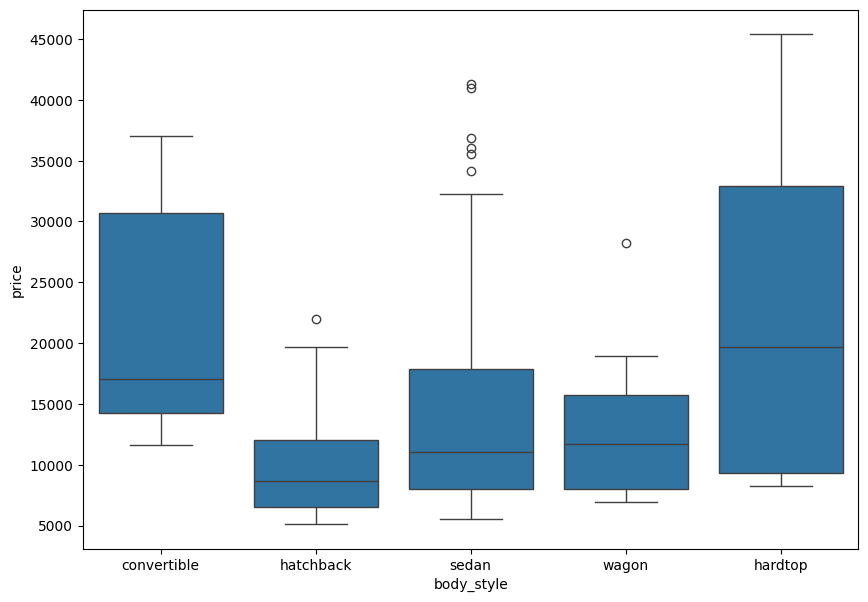

In [125]:
# comparing groups with boxplots (multiple box plots on the same graph)
plt.figure(figsize=(10,7))
sns.boxplot(data=df, x = 'body_style', y='price')

## Visualization techniques => Univariate Analysis => **Bar Graph**
1. **Histogram**
2. **Boxplot**
3. **Bar Graph**
4. **Line Plot**

### Bar Graph

A bar graph is is a chart that represents categorical data using rectangular bars, where the length or height of each bar is proportional to the value it represents.  
Use countplot() function of seaborn to plot a bar graph.

<Axes: xlabel='body_style', ylabel='count'>

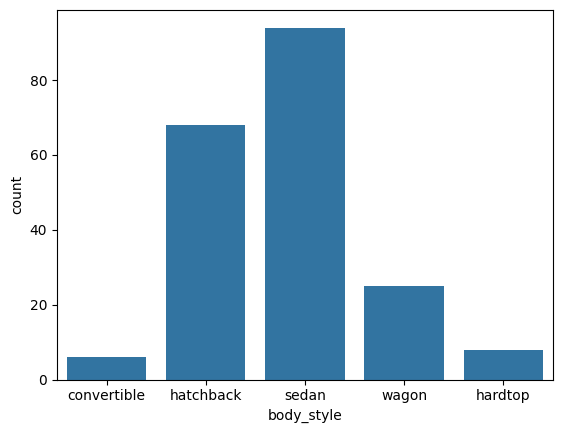

In [129]:
sns.countplot(data=df, x='body_style')

<Axes: xlabel='body_style', ylabel='count'>

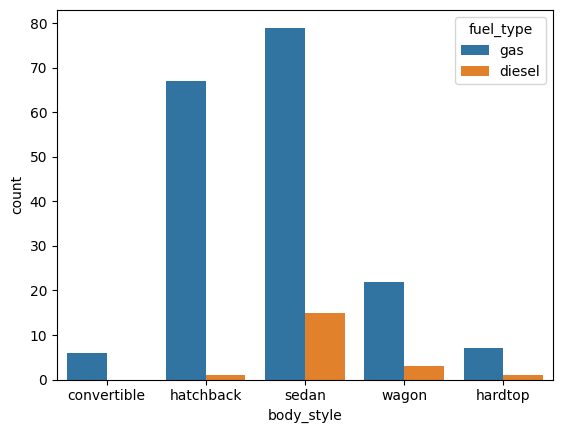

In [130]:
sns.countplot(data=df, x='body_style', hue='fuel_type')

<Axes: xlabel='make', ylabel='count'>

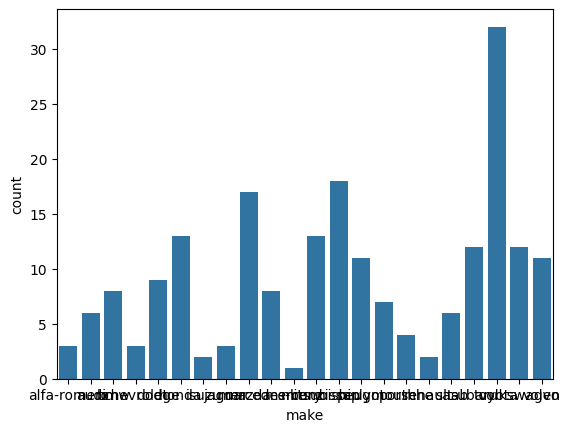

In [131]:
sns.countplot(data=df, x='make')

<Axes: xlabel='make', ylabel='count'>

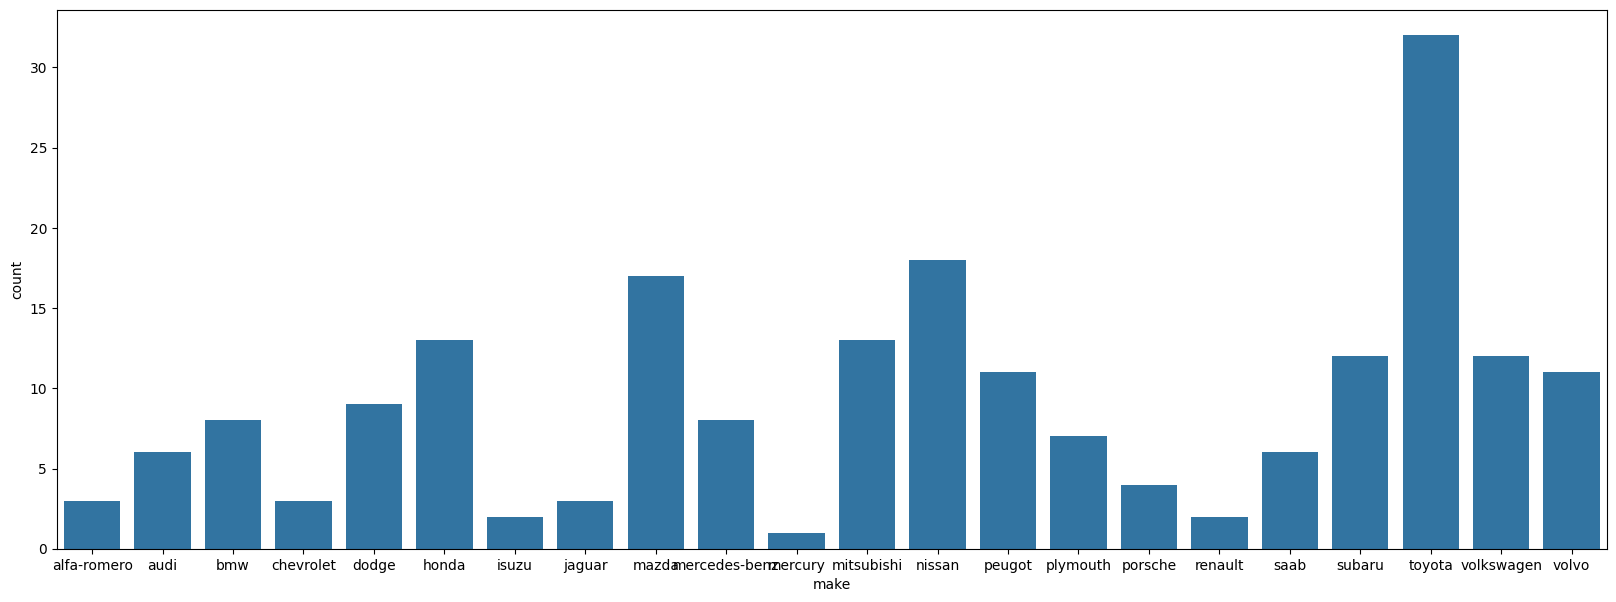

In [132]:
plt.figure(figsize=(20,7))
sns.countplot(data=df, x='make')

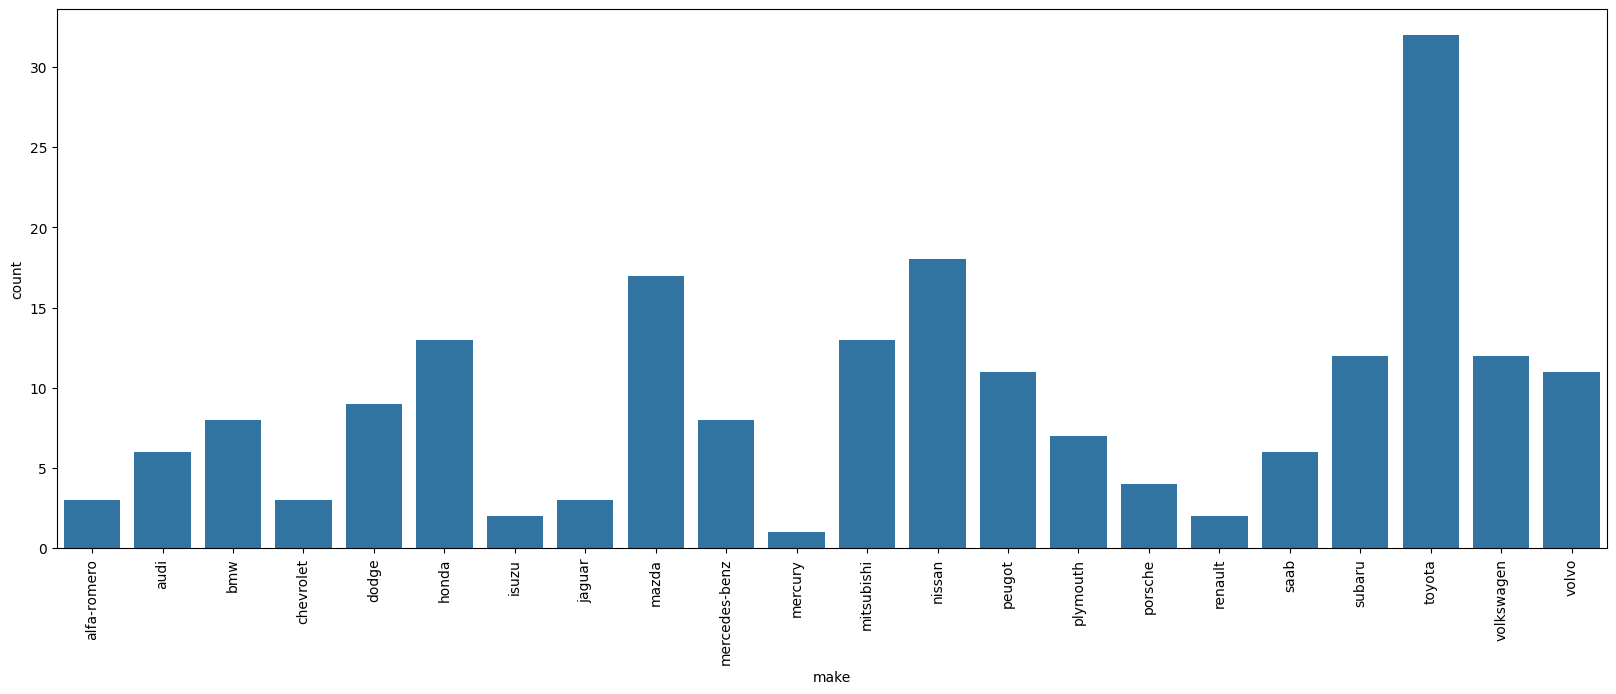

In [134]:
plt.figure(figsize=(20,7))
sns.countplot(data=df, x='make')
plt.xticks(rotation=90);

<Axes: title={'center': 'Barplot:Engine-type'}, xlabel='Engine-type', ylabel='count'>

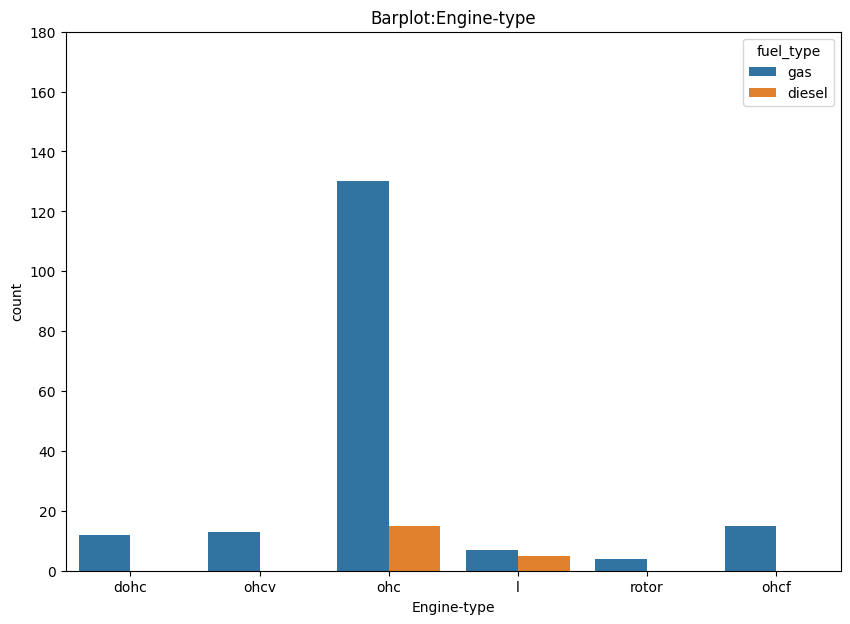

In [136]:
plt.figure(figsize=(10,7))
plt.title('Barplot:Engine-type')
plt.ylim(0, 180)
plt.xlabel('Engine-type')
sns.countplot(data=df, x='engine_type', hue='fuel_type')

## Visualization techniques => Univariate Analysis => **Line Plot**
1. **Histogram**
2. **Boxplot**
3. **Bar Graph**
4. **Line Plot**

### Line Plot
Suppose, your dataset has multiple y values for each x value, a lineplot is a great way to visualize this. This type of data often shows up when we have data that evolves over time, for example, when we have monthly data over several years. If we want to compare the individual months, then a line plot is a great option. This is sometimes called seasonality analysis. A line plot uses straight lines to connect individual data points to display a trend or pattern in the data.


<Axes: xlabel='month', ylabel='passengers'>

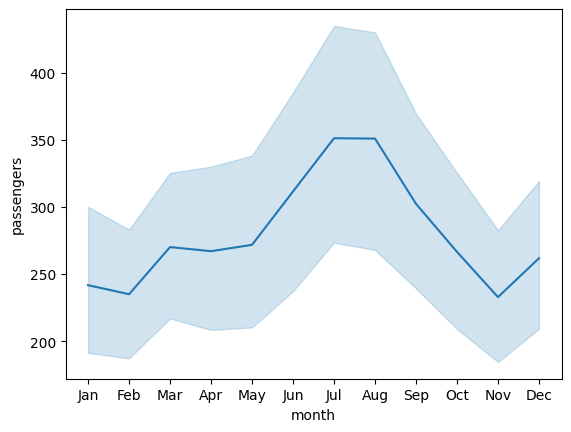

In [137]:
# loading one of the example datasets available in seaborn
flights = sns.load_dataset("flights")

# creating a line plot
sns.lineplot(data = flights, x = 'month', y = 'passengers')

* The light blue shaded area is actually the 'confidence interval' of the y-value estimates for each x-axis value.
* The confidence interval is a range of values around that estimate that are believed to contain the true value of that estimate with a certain probability.

<Axes: xlabel='month', ylabel='passengers'>

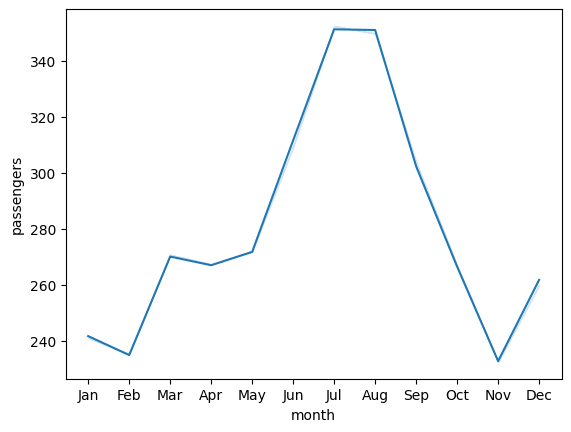

In [139]:
# we can switch off the connfidence interval by setting the ci parameter to 'False'

sns.lineplot(data = flights, x = 'month', y = 'passengers', errorbar=('ci', False))

<Axes: xlabel='month', ylabel='passengers'>

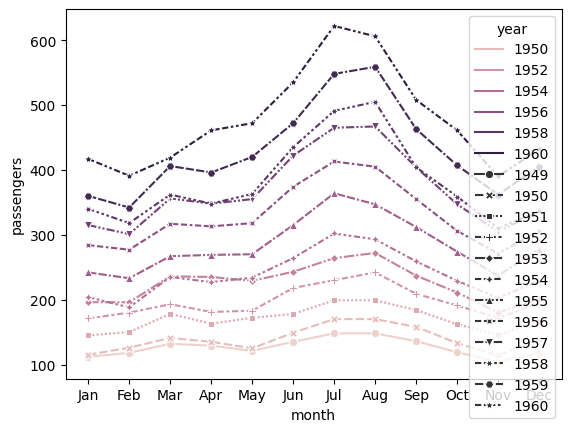

In [142]:
# we can also check the relationship between two variables for different categories by specifying the hue parameter.
sns.lineplot(data = flights, x = 'month', y = 'passengers', errorbar=('ci', False), hue='year', style='year', markers = True )

Note that, unlike barplots and histograms, line plots may not inlcude a zero baseline. We create line chart is to emphasize changes in value, rather than the magnitude of the values themselves, and hence a zero line is not meaningful.

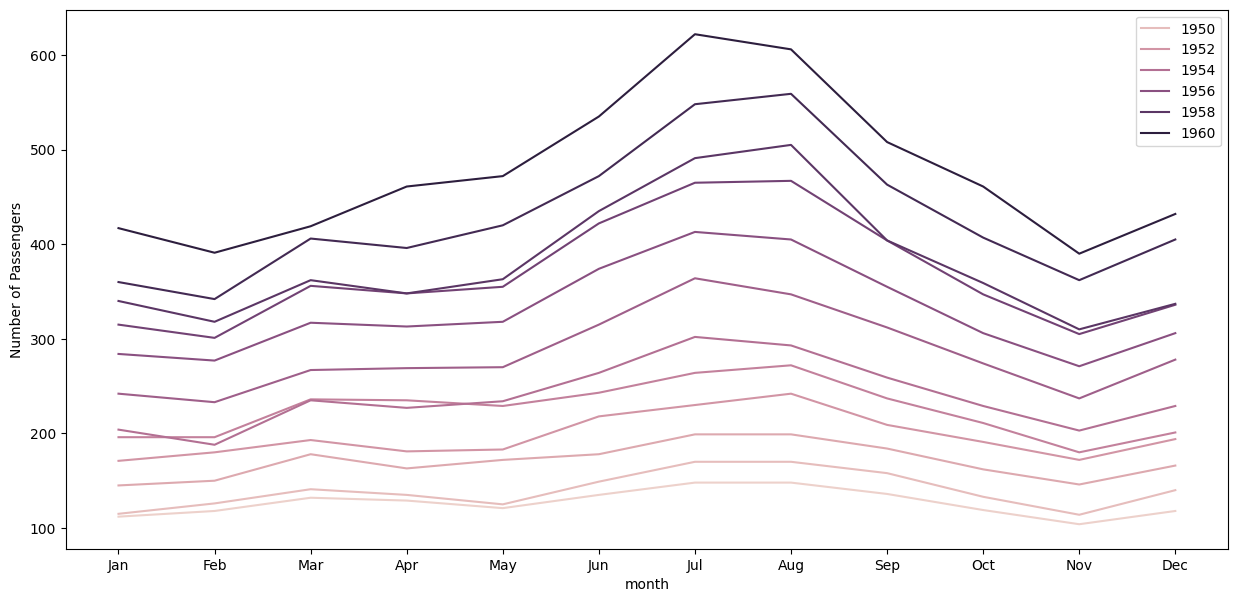

In [143]:
plt.figure(figsize=(15, 7))
sns.lineplot(data = flights, x = 'month', y = 'passengers', hue = 'year')
plt.ylabel('Number of Passengers')
plt.legend(bbox_to_anchor=[1, 1])

## Visualization techniques => Univariate Analysis => Comparision Chart

In [145]:
from IPython.display import Markdown, display

# Read the markdown file
with open('docs/univariate_plots_comparison.md', 'r', encoding='utf-8') as file:
    markdown_content = file.read()

# Dispaly as markdown
display(Markdown(markdown_content))

# Univariate Analysis: Plot Comparison Guide

## Overview
Univariate analysis focuses on examining and describing a single variable at a time. The choice of visualization depends on the data type (continuous vs categorical) and the specific insights you want to gain.

## Comparison Table

| Plot Type | Data Type | Primary Purpose | Key Properties | When to Use | Advantages | Limitations |
|-----------|-----------|----------------|----------------|-------------|------------|-------------|
| **Histogram** | Continuous | Show distribution shape and frequency | • Bins data into intervals<br>• Shows frequency/density<br>• Reveals distribution shape | • Understand data distribution<br>• Identify skewness, modality<br>• Detect outliers<br>• Large datasets | • Clear distribution visualization<br>• Shows data density<br>• Identifies patterns like normal, skewed distributions | • Bin size affects interpretation<br>• Can lose individual data points<br>• Not suitable for small datasets |
| **Box Plot** | Continuous | Display statistical summary and outliers | • Shows median, quartiles<br>• Identifies outliers<br>• Compact representation<br>• Shows data spread | • Compare distributions<br>• Identify outliers quickly<br>• Summarize key statistics<br>• Multiple group comparison | • Robust to outliers<br>• Space-efficient<br>• Shows key statistics at glance<br>• Good for comparison | • Hides distribution shape<br>• Less detail than histogram<br>• Can miss multimodal patterns |
| **Bar Graph** | Categorical | Show frequency/count of categories | • Height represents frequency<br>• Discrete categories<br>• Clear category comparison<br>• Can be horizontal/vertical | • Compare category frequencies<br>• Show categorical distributions<br>• Display survey results<br>• Nominal/ordinal data | • Easy to interpret<br>• Clear category comparison<br>• Works with any number of categories | • Only for categorical data<br>• Can be cluttered with many categories<br>• Doesn't show relationships |
| **Line Plot** | Continuous (ordered) | Show trends over time/sequence | • Connected data points<br>• Shows temporal patterns<br>• Reveals trends and cycles<br>• Ordered x-axis | • Time series analysis<br>• Show trends over time<br>• Sequential/ordered data<br>• Change visualization | • Excellent for trends<br>• Shows patterns over time<br>• Good for forecasting context | • Requires ordered data<br>• Can be misleading without context<br>• Not suitable for unordered data |

## Data Type Decision Matrix

### For Continuous Data:
- **Distribution analysis** → Histogram
- **Statistical summary + outliers** → Box Plot  
- **Trends over time/sequence** → Line Plot
- **Not applicable** → Bar Graph

### For Categorical Data:
- **Category frequency comparison** → Bar Graph
- **Not typically used** → Histogram, Box Plot, Line Plot

## Key Considerations When Choosing

### 1. **Data Type First**
- **Continuous data**: Histogram, Box Plot, or Line Plot
- **Categorical data**: Bar Graph

### 2. **Analysis Goal**
- **Distribution shape**: Histogram
- **Statistical summary**: Box Plot
- **Category comparison**: Bar Graph
- **Temporal trends**: Line Plot

### 3. **Data Characteristics**
- **Small dataset**: Box Plot or Bar Graph
- **Large dataset**: Histogram
- **Many outliers**: Box Plot
- **Time-ordered**: Line Plot

### 4. **Comparison Needs**
- **Single variable**: Any appropriate plot
- **Multiple groups**: Box Plot (side-by-side) or multiple Bar Graphs
- **Over time**: Line Plot

## Common Mistakes to Avoid

1. **Using histograms for categorical data** - Use bar graphs instead
2. **Using line plots for non-sequential data** - Points shouldn't be connected if order doesn't matter
3. **Wrong bin sizes in histograms** - Too few bins hide patterns, too many create noise
4. **Ignoring outliers in box plots** - Always investigate what outliers represent
5. **Overcrowded bar graphs** - Consider grouping or rotating labels for many categories

## Quick Reference Guide

**"What plot should I use?"**

1. **Is your data continuous or categorical?**
   - Categorical → Bar Graph
   - Continuous → Continue to step 2

2. **What do you want to know about your continuous data?**
   - Overall distribution shape → Histogram
   - Statistical summary + outliers → Box Plot
   - Changes over time/sequence → Line Plot

3. **Do you need to compare groups?**
   - Yes → Consider side-by-side plots of chosen type
   - No → Single plot of chosen type

Remember: The best visualization clearly communicates your data's story to your intended audience.

## Univariate Analysis => On Melbourne_Housing data
Univariate analysis focuses on analyzing one variable at a time.  
It examines the distribution, summary statistics, and patterns within a single variable.  

Applications of univariate analysis are:
* Understanding the distribution of a variable
* Identifying outliers and anomalies
* Assessing the variability and central tendency of the data.

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.width', 300)

data = pd.read_csv('data/Melbourne_Housing.csv')

data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)
data['BuildingArea'] = data['BuildingArea'].replace(['missing','inf'], np.nan)
data['BuildingArea'] = data['BuildingArea'].astype(float)
data.drop_duplicates(inplace=True)
data.reset_index(drop=True, inplace=True)

data.info()
data.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27103 entries, 0 to 27102
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         27103 non-null  object        
 1   Rooms          27103 non-null  int64         
 2   Type           27103 non-null  object        
 3   SellerG        27103 non-null  object        
 4   Date           27103 non-null  datetime64[ns]
 5   Distance       27102 non-null  float64       
 6   Postcode       27102 non-null  float64       
 7   Bedroom        20678 non-null  float64       
 8   Bathroom       20672 non-null  float64       
 9   Car            20297 non-null  float64       
 10  Landsize       17873 non-null  float64       
 11  BuildingArea   10529 non-null  float64       
 12  YearBuilt      11985 non-null  float64       
 13  Regionname     27103 non-null  object        
 14  Propertycount  27103 non-null  int64         
 15  Price          2710

,count,mean,min,25%,50%,75%,max,std
Rooms,27103.000,2.992,1.000,2.000,3.000,4.000,16.000,0.955
Date,27103,2017-05-23 12:25:09.441759488,2016-01-28 00:00:00,2016-11-19 00:00:00,2017-07-08 00:00:00,2017-10-28 00:00:00,2018-03-17 00:00:00,NaN
Distance,27102.000,11.280,0.000,6.400,10.500,14.000,48.100,6.784
Postcode,27102.000,3113.787,3000.000,3046.000,3088.000,3153.000,3978.000,111.129
Bedroom,20678.000,3.046,0.000,2.000,3.000,4.000,20.000,0.955
Bathroom,20672.000,1.592,0.000,1.000,1.000,2.000,9.000,0.701
Car,20297.000,1.716,0.000,1.000,2.000,2.000,18.000,0.994
Landsize,17873.000,560.537,50.000,220.000,513.000,664.000,76000.000,1411.309
BuildingArea,10529.000,154.512,11.000,101.000,133.000,183.000,6791.000,130.584
YearBuilt,11985.000,1966.618,1850.000,1950.000,1970.000,2000.000,2019.000,36.042


In [6]:
data['Distance'].isnull().sum()
data[data['Distance'].isnull()]

,Suburb,Rooms,Type,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,Price
9590,Fawkner Lot,3,h,Brad,2018-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Northern Metropolitan,962,616000


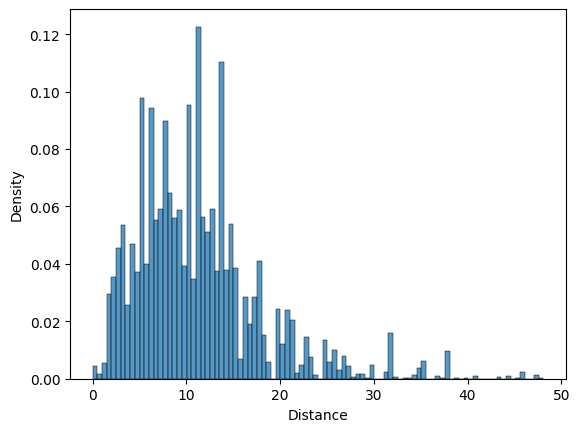

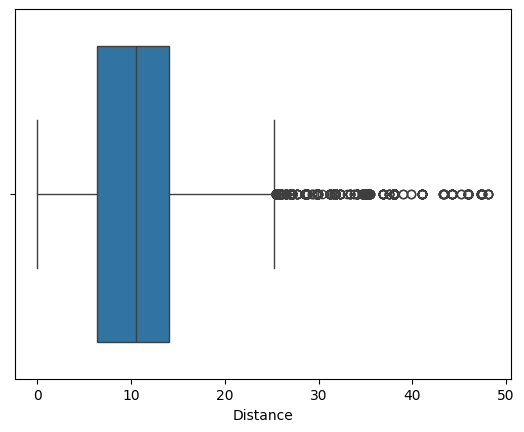

In [ ]:
# Observation on distance
sns.histplot(data=data, x='Distance', stat='density')
plt.show()
sns.boxplot(data=data, x='Distance')
plt.show()

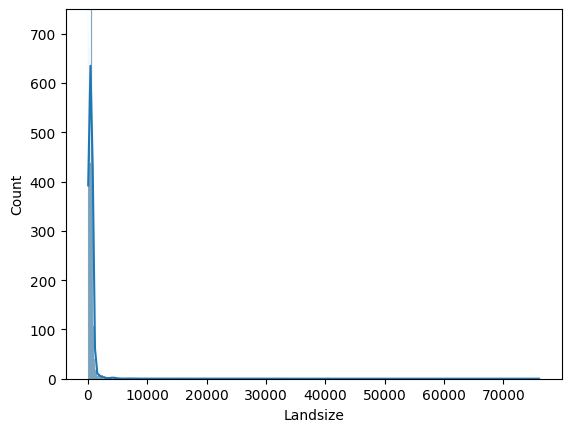

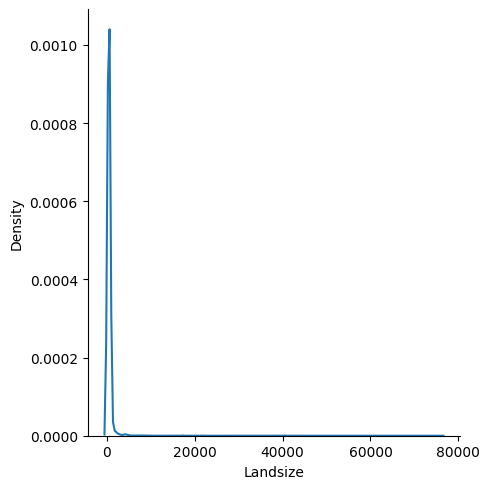

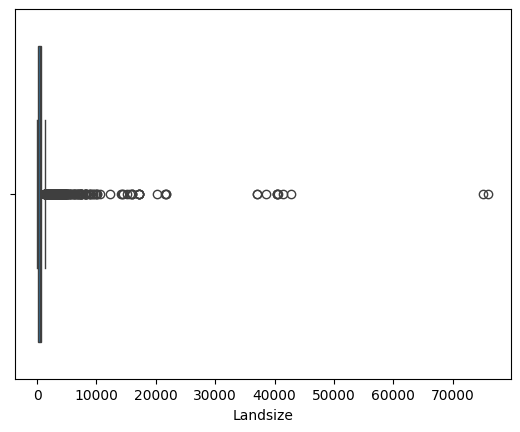

In [22]:
# Observation on Landsize
sns.histplot(data=data, x='Landsize', kde=True)
plt.ylim(0, 750)
plt.show()
sns.displot(data=data, x='Landsize', kind='kde')
plt.show()
sns.boxplot(data=data, x='Landsize')
plt.show()

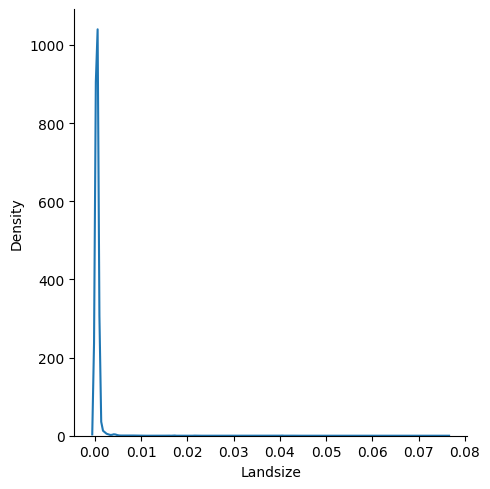

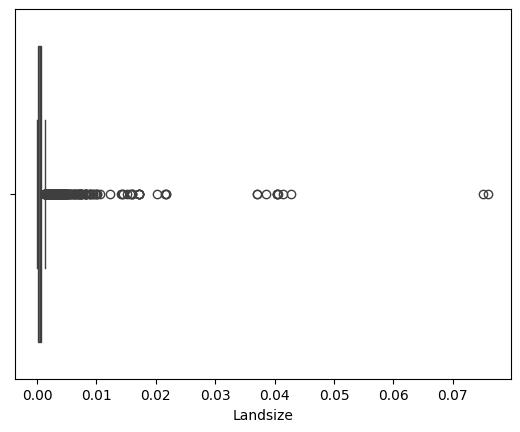

In [3]:
# converting Landsize to sq. kilometeres from sq. metres
sns.displot(data=data, x=data['Landsize']/1000000, kind='kde')
plt.show()
sns.boxplot(data=data, x=data['Landsize']/1000000)
plt.show()

In [4]:
data.loc[data['Landsize']>60000]

,Suburb,Rooms,Type,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,Price
23897,Silvan,3,h,Harcourts,2017-05-27,34.600,3795.000,3.000,2.000,2.000,76000.000,NaN,NaN,Eastern Victoria,457,1085000
25079,Balwyn North,3,h,Kay,2016-08-28,9.200,3104.000,3.000,1.000,2.000,75100.000,NaN,NaN,Southern Metropolitan,7809,2000000


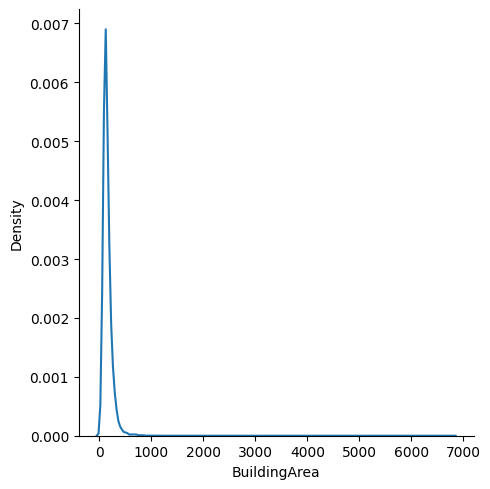

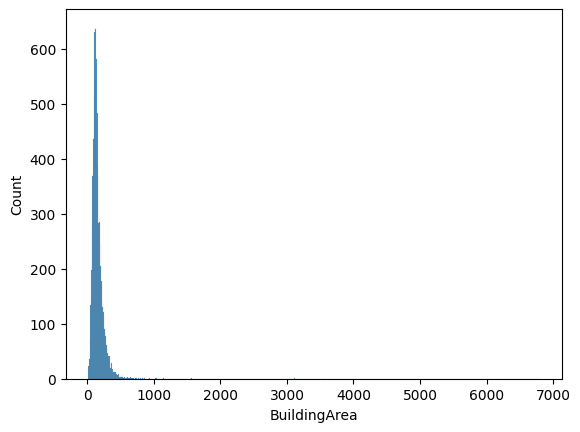

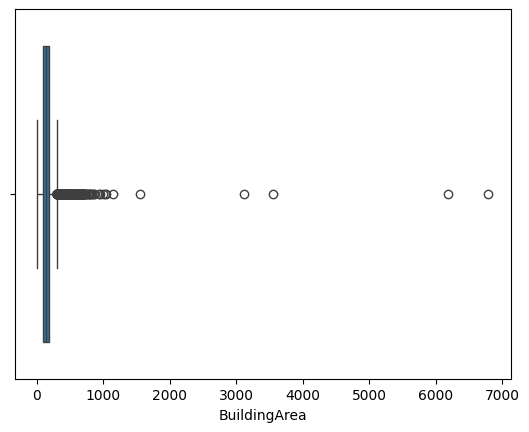

In [7]:
# observations on building Area
sns.displot(data=data, x='BuildingArea', kind='kde')
plt.show()
sns.histplot(data=data, x='BuildingArea')
plt.show()
sns.boxplot(data=data, x='BuildingArea')
plt.show()

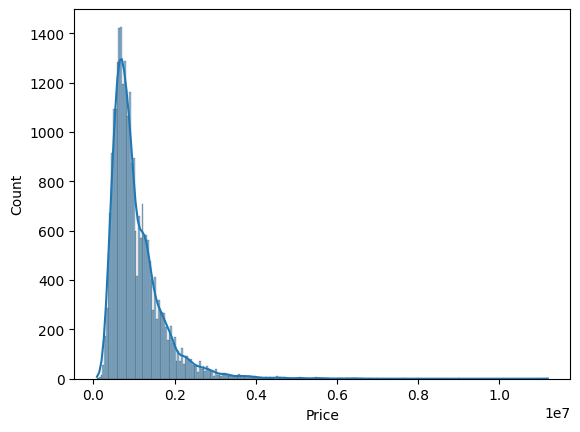

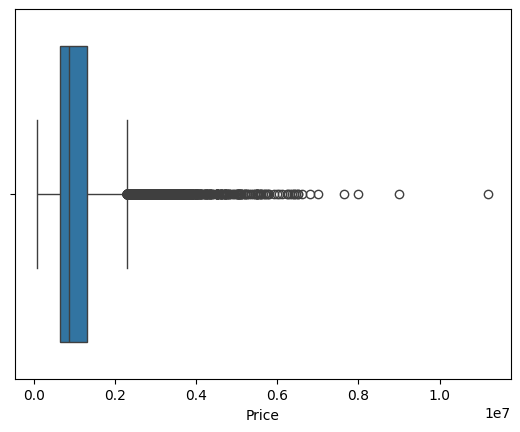

In [8]:
# observations on price
sns.histplot(data=data, x='Price', kde=True)
plt.show()
sns.boxplot(data=data, x='Price')
plt.show()

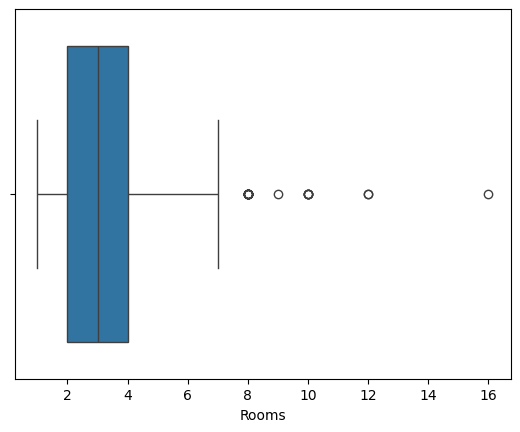

In [9]:
# observation on rooms
sns.boxplot(data=data, x='Rooms')
plt.show()

In [27]:
print(data.loc[data['Rooms']>7].shape)
print(data.loc[data['Rooms']>7]['Rooms'].count())
print(data.loc[data['Rooms']>7]['Rooms'].value_counts())
print(data.loc[data['Rooms']>7, 'Type'].value_counts())

(23, 16)
23
Rooms
8     14
10     5
12     2
9      1
16     1
Name: count, dtype: int64
Type
h    21
u     2
Name: count, dtype: int64


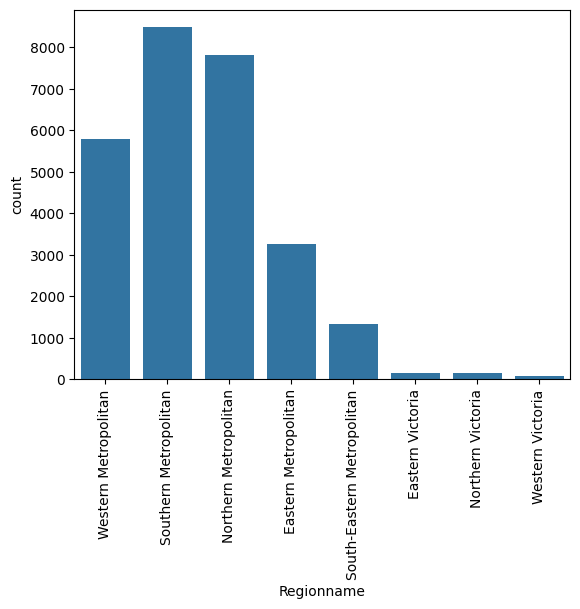

In [28]:
# observation on Region name
sns.countplot(data=data, x='Regionname')
plt.xticks(rotation=90)
plt.show()